### Анализ президентских выборов в Беларуси 2020


По следам видео Савватеева "Разбор выборов с Сергеем Шпилькиным"
- Ссылка на видео: https://www.youtube.com/watch?v=AbAPzs3P2Yo&t=1s
- Материалы: https://disk.yandex.ru/i/bgGIGT4iWkL0Hg
- Доклад об электронном голосовании в Москве: https://drive.google.com/file/d/1L9U2ssdjw_nRJMjBIzebhPDppfoWZgmJ/view

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
elections = pd.read_excel('elections.xlsx')

In [31]:
region = elections.iloc[:,0]
city = elections.iloc[:,2]
addr = elections.iloc[:,3]

all_voters = elections.iloc[:,7]
voted = elections.iloc[:,9]

dmitriev = elections.iloc[:,13]
konopackaya = elections.iloc[:,14]
luka = elections.iloc[:,15]
svetlana = elections.iloc[:,16]
cherechen = elections.iloc[:,17]
against_all = elections.iloc[:,19]

el_small = pd.concat([region, city, addr, all_voters, voted, dmitriev, konopackaya, luka, svetlana, cherechen, against_all], axis=1)

rename_it = {
            "Область": "region",
            "Нас. пункт": "city",
            "Адрес": "addres",
            "1. Агульная колькасць выбаршчыкаў": "all_voters",
            "3. Колькасць выбаршчыкаў, якія прынялі удзел у галасаванні": "voted",
            "6. Против всех": "against_all",
            "Дмитриев": "dmitriev",
            "Канопацкая": "konopackaya",
            "Лукашенко": "luka",
            "Тихановская ": "svetlana",
            "Черечень": "cherechen"}

el_small.rename(inplace=True, columns=rename_it)

In [34]:
el_small["diff"] = abs((el_small["dmitriev"] + el_small["konopackaya"] + el_small["luka"] + el_small["svetlana"] + el_small["cherechen"] +el_small["against_all"]) - el_small["voted"])
el_small["appearance"] = round(el_small["voted"] / el_small['all_voters'], 2) # явка
el_small["svet"] = round(el_small["svetlana"] / el_small['voted'], 2) # процент голосов за Светлану
el_small["usach"] = round(el_small["luka"] / el_small['voted'], 2) # процент голосов за луку

In [6]:
def draw_dots(df):
    plt.figure(figsize=(10, 8), dpi=80)

    plt.plot(df["appearance"], df["svet"] , 'r.', label="Тихановская")
    plt.plot(df["appearance"], df["usach"], 'b.', label="Лукашенко")

    plt.xlabel('Явка')
    plt.ylabel('Результат кандидата')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.show()

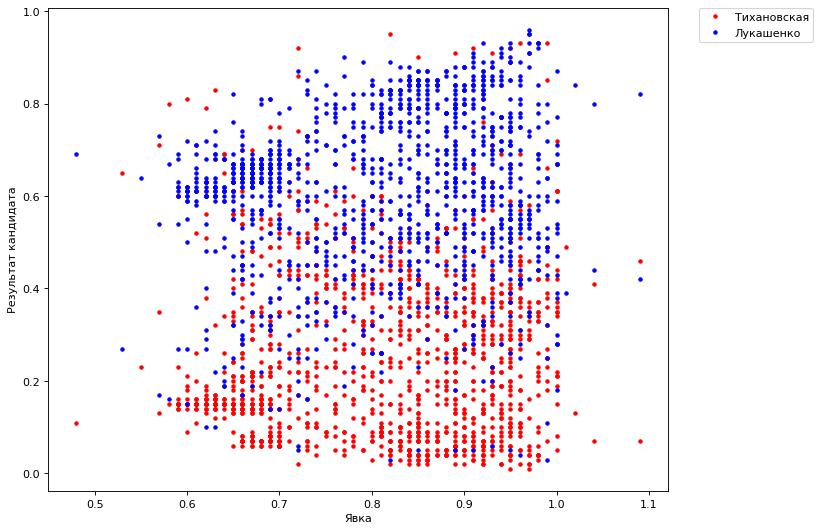

In [7]:
draw_dots(el_small)

/Users/vadim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vadim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='appearance', ylabel='svet'>

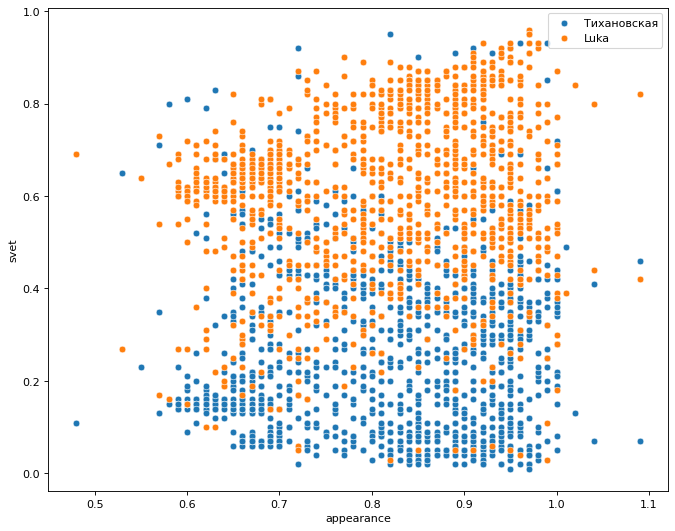

In [17]:

plt.figure(figsize=(10, 8), dpi=80)

sns.scatterplot(el_small["appearance"], el_small["svet"], palette='deep', label="Тихановская")
sns.scatterplot(el_small["appearance"], el_small["usach"], palette='deep', label="Luka")

### Полная "анархия", разброс значений – свидетельство сумбурных, беспорядочных фальсификаций. 
Вообще, один участок (~2000 избирателей) – хорошая модель всех выборов. Все участки в стране в теории должны мало отличаются по проценту явки и своим предпочтениям (голосам за кандидатов).

В подтверждении этих слов: выборы в президенты России в 96ом году. Каждая точка – это УИК. 
Здесь и явка (по всем участкам в Москве) примерно одинаковая и распределение голосов (4 четких кластера на графике справа) почти совпадает на всех участках 




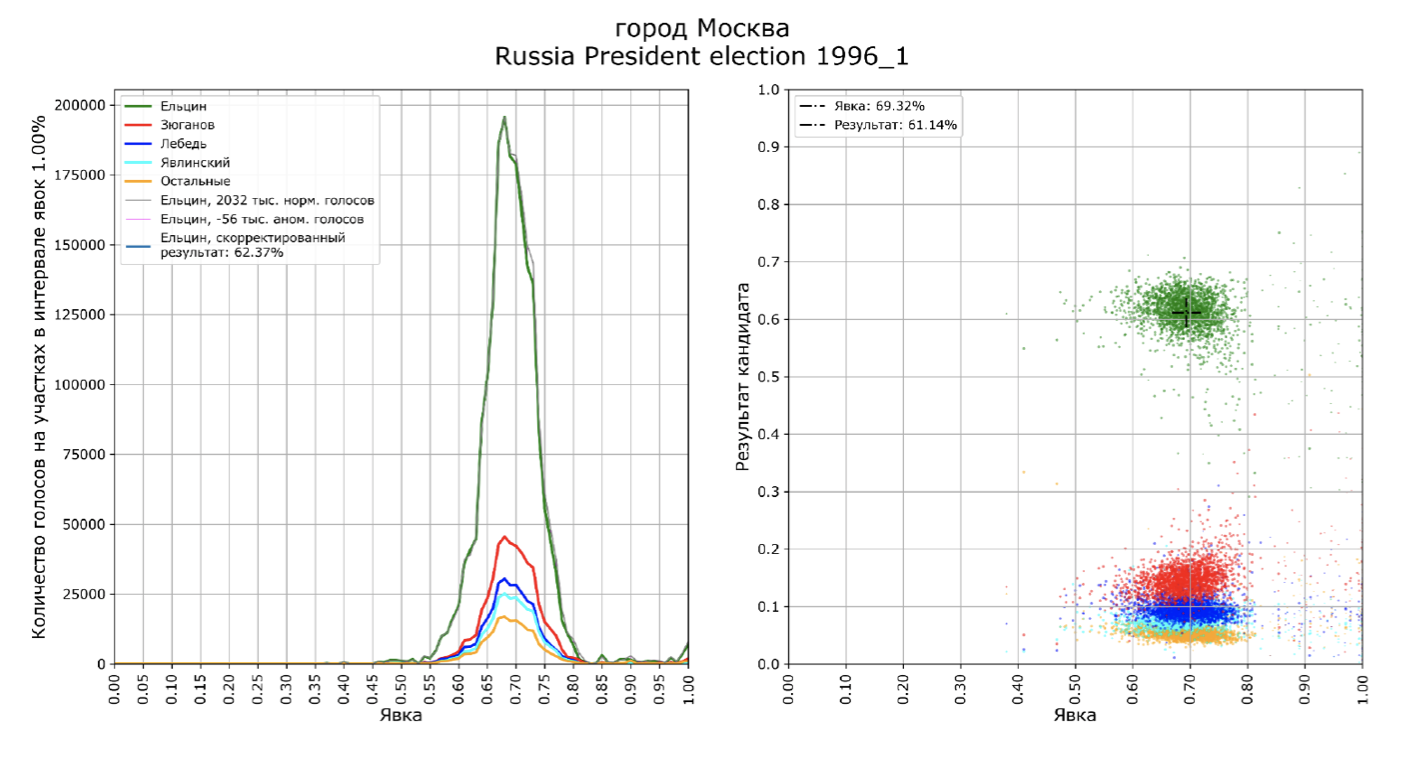

In [36]:
def draw_grouped_plot(grouped):
    plt.figure(figsize=(10, 8), dpi=80)

    plt.plot(grouped['svetlana'], 'r', label="Тихановская")
    plt.plot(grouped['luka'], 'b', label="Лукашенко")
    
    plt.plot(0.95, 65277, 'rx', label="Пики на 'красивых' явках 85% и 95%")
    plt.plot(0.85, 51959, 'rx')

    plt.xlabel('Явка')
    plt.ylabel('Количество голосов на участках в интервале явок 1%')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(np.arange(0.5, 1.1, 0.05))
    plt.grid()

    plt.show()

### График зависимости "Явка – Количество голосов за кандидата"

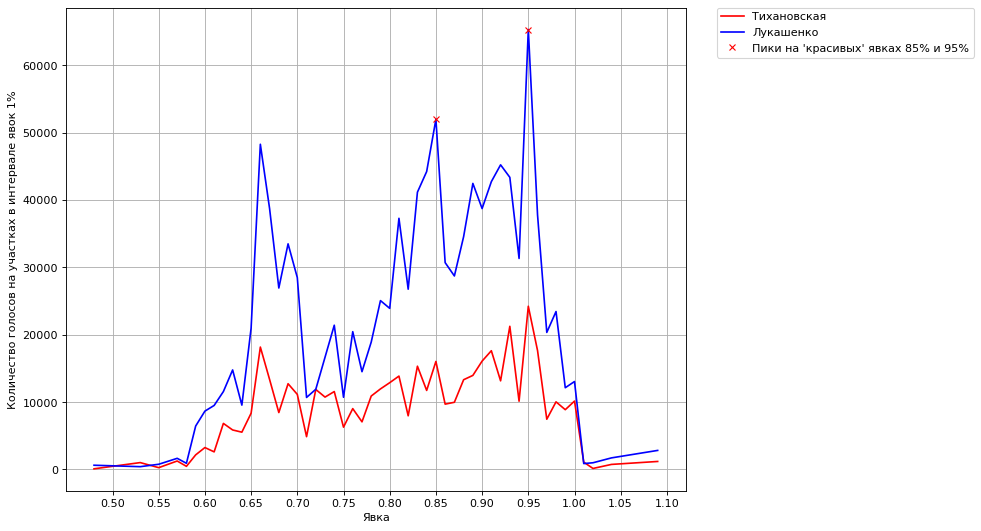

In [37]:
grouped = el_small.groupby(['appearance']).sum()
draw_grouped_plot(grouped)

### Также полный "хаос" и никаких закономерностей. Пилы – свидетельство фальсификаций

### Где лука "взял" больше всего голосов?
Ответ: На участках с красивыми 95% и 85% явками

In [39]:
grouped.sort_values('luka', ascending=False).head()

,all_voters,voted,dmitriev,konopackaya,luka,svetlana,cherechen,against_all,diff,svet,usach
appearance,,,,,,,,,,,
0.95,104010.0,98879,1266.0,1179,65277,24221,1226.0,4808.0,892.0,15.60,35.75
0.85,92467.0,78566,1267.0,1403,51959,16033,1001.0,6554.0,644.0,9.99,31.54
0.66,123971.0,81896,1645.0,2305,48256,18165,1441.0,7582.0,2502.0,14.19,37.94
0.92,71317.0,65603,1114.0,1074,45204,13154,997.0,3780.0,280.0,8.94,29.49
0.84,74474.0,62521,911.0,1105,44208,11731,793.0,3441.0,332.0,8.00,26.90


### Регионы с наибольшим количеством побед у Светланы

In [40]:
sveta_win_df = el_small[el_small["svetlana"] > el_small["luka"]]
#draw_dots(sveta_win_df)

regions = sveta_win_df.region.value_counts()
for i, v in regions.items():
    print(f'region {i} count {v}')

region Минская count 62
region Минск count 53
region Гродненская count 29
region Брестская count 27
region Гомельская count 11
region Витебская count 9
region Могилевская count 4


### Распределение последних цифр 6 граф протоколов (2940 чисел)

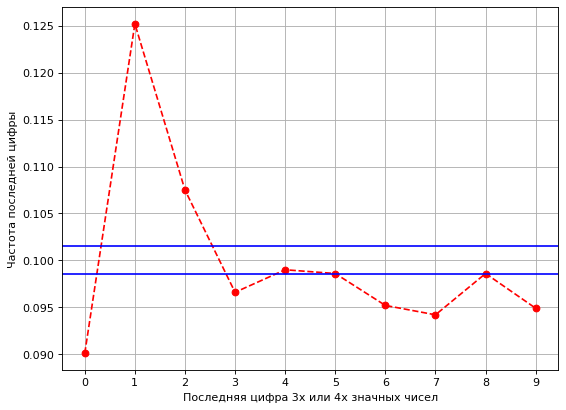

In [23]:
columns = ['dmitriev', 'konopackaya', 'luka', 'svetlana', 'cherechen', 'against_all']
m = {}
hist = []

for column in columns:
    for n in el_small[column].values:
        if n/100 >= 1:
            x = int(n%10)
            m[x] = m.get(x, 0) + 1
            hist.append(x)

summa = sum(m.values())

#digits = pd.DataFrame(sorted(m.items()))
#digits[2] = round(digits[1] / summa, 4)

m.update((x, round(y/summa, 4)) for x, y in m.items())
m = sorted(m.items())
x, y = zip(*m) # unpack a list of pairs into two tuples


plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x, y, 'r', linestyle='--', marker='o')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Последняя цифра 3х или 4х значных чисел')
plt.ylabel('Частота последней цифры')

plt.grid()
plt.axhline(y=0.0985, color='b', linestyle='-')
plt.axhline(y=0.1015, color='b', linestyle='-')
plt.show()

### Неестественный выброс на единице

### Какой процент "за луку" рисовали на участках чаще всего?

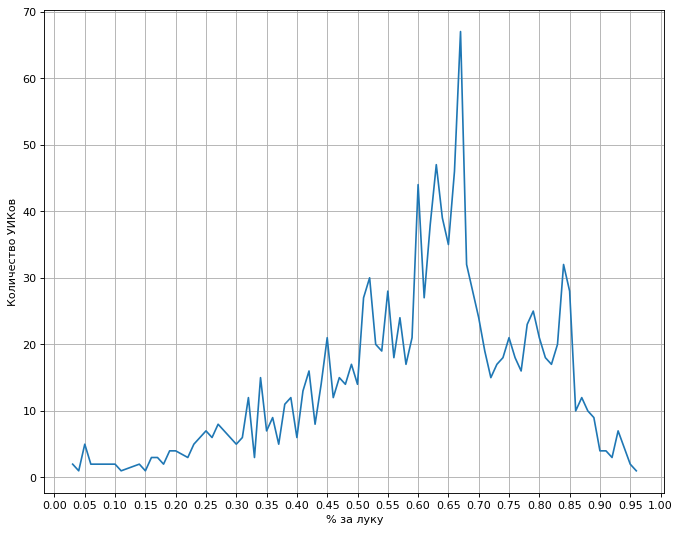

In [25]:
plt.figure(figsize=(10, 8), dpi=80)
plt.grid()
plt.xticks(np.arange(0, 1.1, 0.05))
n = sorted(el_small['usach'].value_counts().items())
a, b = zip(*n)
plt.plot(a, b, '-')

plt.xlabel('% за луку')
plt.ylabel('Количество УИКов')

plt.show()

### Где у луки меньше 20%?

In [27]:
el_small[['city', 'voted', 'svetlana', 'luka', 'svet', 'usach']][el_small['usach'] < 0.2].sort_values(by='svet')

,city,voted,svetlana,luka,svet,usach
1112,Минск,2061,1226,394,0.59,0.19
696,д. Боровляны,1538,1048,291,0.68,0.19
469,Лида,1192,825,228,0.69,0.19
709,аг. Лесной,1231,860,235,0.70,0.19
711,аг. Лесной,1409,985,242,0.70,0.17
1156,Минск,1193,848,207,0.71,0.17
1041,Минск,2396,1725,438,0.72,0.18
713,аг. Лесной,1737,1274,279,0.73,0.16
716,д. Копище,1737,1274,279,0.73,0.16
742,аг. Колодищи,1655,1230,277,0.74,0.17


### *Notes*

Джерриме́ндеринг — произвольная демаркация избирательных округов с целью искусственного изменения соотношения политических сил в них и, как следствие, в целом на территории проведения выборов. https://ru.wikipedia.org/wiki/Джерримендеринг

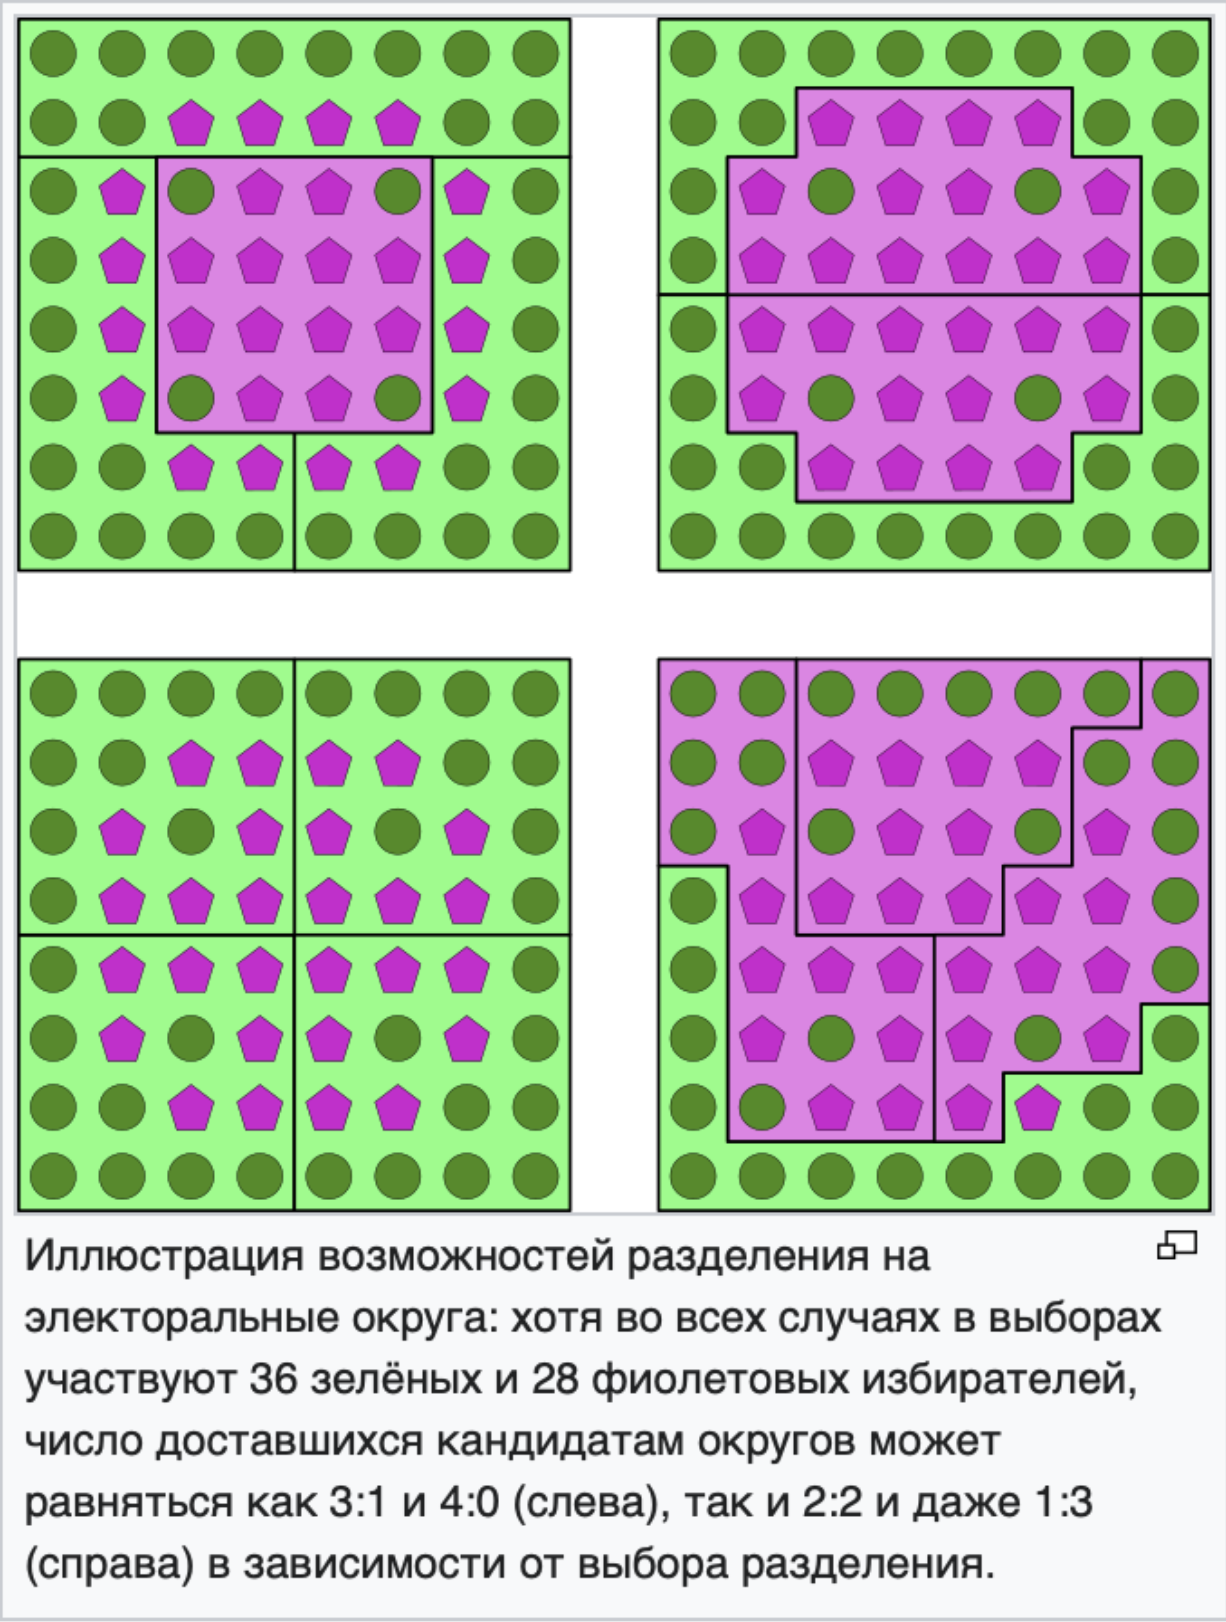